# **Task 1**

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf


# Fetch historical data for NASDAQ
nasdaq = yf.download('^IXIC', start='2010-01-01', end='2023-05-01')  

# Fetch historical data for NSE
nse = yf.download('^NSEI', start='2010-01-01', end='2023-05-01')  

# Extract the closing prices
nasdaq_close = nasdaq['Close']
nse_close = nse['Close']

# Calculate the correlation coefficient
correlation_coefficient = nasdaq_close.corr(nse_close)

print("Correlation coefficient:", correlation_coefficient)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Correlation coefficient: 0.9513138758576785


### **Analyzing the correlation coefficient**

Strength of correlation: A correlation coefficient of 0.9513 suggests a strong linear relationship between the two indices. The values of the indices tend 
to move in the same direction, and changes in one index are highly likely to be accompanied by similar changes in the other index.


Positive correlation: The positive correlation coefficient indicates that when one index increases, the other index tends to increase as well. 
Conversely, when one index decreases, the other index tends to decrease. This positive correlation suggests that the indices share common factors 
or are influenced by similar market conditions.


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Task 2**

In [2]:
print(nasdaq_close)

Date
2010-01-04     2308.419922
2010-01-05     2308.709961
2010-01-06     2301.090088
2010-01-07     2300.050049
2010-01-08     2317.169922
                  ...     
2023-04-24    12037.200195
2023-04-25    11799.160156
2023-04-26    11854.349609
2023-04-27    12142.240234
2023-04-28    12226.580078
Name: Close, Length: 3353, dtype: float64


In [3]:
print(nse_close)

Date
2010-01-04     5232.200195
2010-01-05     5277.899902
2010-01-06     5281.799805
2010-01-07     5263.100098
2010-01-08     5244.750000
                  ...     
2023-04-24    17743.400391
2023-04-25    17769.250000
2023-04-26    17813.599609
2023-04-27    17915.050781
2023-04-28    18065.000000
Name: Close, Length: 3268, dtype: float64


The lengths of the nasdaq and nse dataframes are not be the same because the stock market trading hours and holidays are different between the NASDAQ and NSE. This lead to variations in the number of trading days and thus different lengths of the historical data.

In [4]:
# Align the data based on common trading days
aligned_data = nasdaq.merge(nse, on='Date', how='inner')

# Extract the closing prices
nasdaq_close = aligned_data['Close_x']
nse_close = aligned_data['Close_y']

In [5]:
print(nasdaq_close)

Date
2010-01-04     2308.419922
2010-01-05     2308.709961
2010-01-06     2301.090088
2010-01-07     2300.050049
2010-01-08     2317.169922
                  ...     
2023-04-24    12037.200195
2023-04-25    11799.160156
2023-04-26    11854.349609
2023-04-27    12142.240234
2023-04-28    12226.580078
Name: Close_x, Length: 3182, dtype: float64


In [6]:
print(nse_close)

Date
2010-01-04     5232.200195
2010-01-05     5277.899902
2010-01-06     5281.799805
2010-01-07     5263.100098
2010-01-08     5244.750000
                  ...     
2023-04-24    17743.400391
2023-04-25    17769.250000
2023-04-26    17813.599609
2023-04-27    17915.050781
2023-04-28    18065.000000
Name: Close_y, Length: 3182, dtype: float64


In [7]:
# Limit maximum lag days to 20
max_lag = 20

# Calculate the correlation coefficients for each lag period
correlations = []
for lag in range(1, max_lag + 1):
  corr = np.corrcoef(nasdaq_close[:-lag], nse_close[lag:])[0, 1]
  correlations.append(corr)

# Find the lag period with the maximum correlation coefficient
max_corr_lag = np.argmax(correlations)
max_corr = correlations[max_corr_lag]

print("Maximum correlation coefficient:", max_corr)
print("Lag period with maximum correlation:", max_corr_lag)

Maximum correlation coefficient: 0.952588022856614
Lag period with maximum correlation: 19


### **The NASDAQ index should be used as the index for parameter optimization**

###**EXPLANATION**
Since the NASDAQ index is leading by 19 days with a high correlation to the NSE index, we can conclude that the NASDAQ index can be used as a leading indicator for parameter optimization. This means that the NASDAQ index's historical data can be used to optimize the parameters of the indicators (Keltner Channel, Bollinger Bands, MACD) for trading on the NSE index.

The lead-lag relationship suggests that changes or patterns in the NASDAQ index tend to occur before similar changes or patterns in the NSE index. By using the NASDAQ index as a leading indicator, we can potentially identify optimal parameter settings that could lead to profitable trading strategies on the NSE index.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Task 3**

In [8]:
import matplotlib.pyplot as plt

### **Keltner** **Channel**

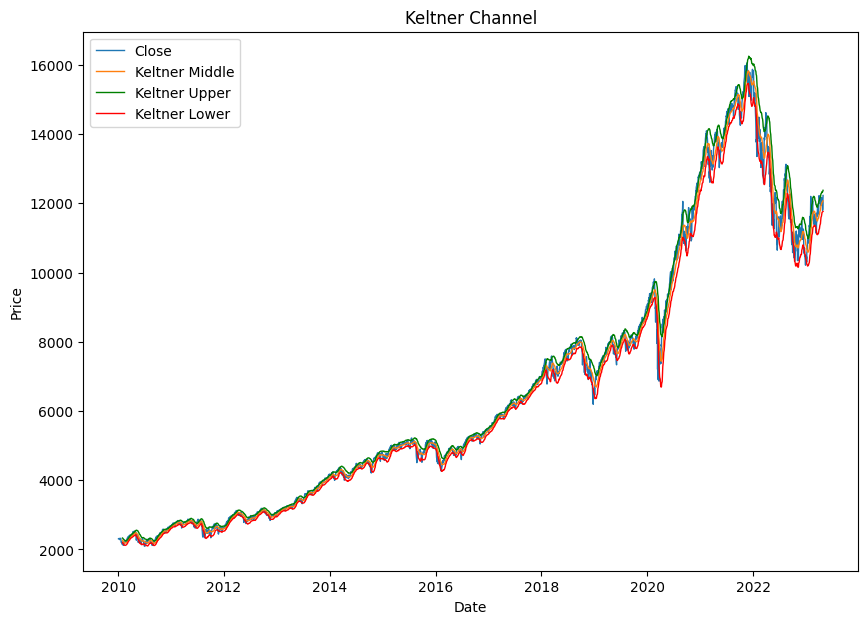

In [9]:
# Calculate Keltner Channel
window_size = 20
multiplier = 2
nasdaq['Typical Price'] = (nasdaq['High'] + nasdaq['Low'] + nasdaq['Close']) / 3
nasdaq['ATR'] = nasdaq['High'] - nasdaq['Low']
nasdaq['kc_middle'] = nasdaq['Typical Price'].rolling(window_size).mean()
nasdaq['kc_upper'] = nasdaq['kc_middle'] + multiplier * nasdaq['ATR'].rolling(window_size).mean()
nasdaq['kc_lower'] = nasdaq['kc_middle'] - multiplier * nasdaq['ATR'].rolling(window_size).mean()

# Plotting
plt.figure(figsize=(10, 7))

plt.title('Keltner Channel')
plt.xlabel('Date')
plt.ylabel('Price')


plt.plot(nasdaq['Close'],lw=1, label='Close')
plt.plot(nasdaq['kc_middle'],lw=1, label='Keltner Middle')
plt.plot(nasdaq['kc_upper'],'g',lw=1, label='Keltner Upper')
plt.plot(nasdaq['kc_lower'],'r',lw=1, label='Keltner Lower')

plt.legend()

plt.show()

### **Bollinger Bands**

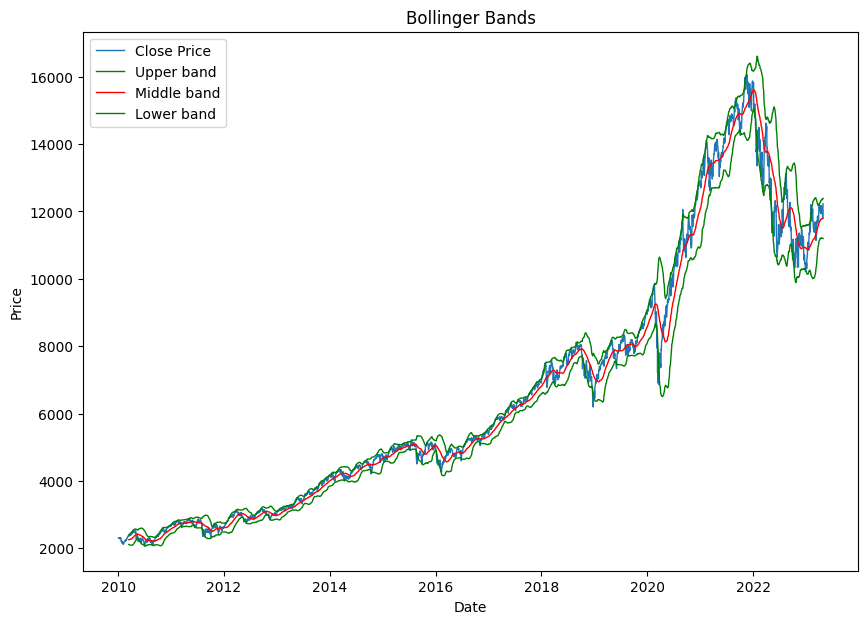

In [10]:
# Compute the Bollinger Bands

def BBANDS(data, n):
  MA = data.Close.rolling(n).mean()
  SD = data.Close.rolling(n).std()
  data['MiddleBand'] = MA
  data['UpperBand'] = MA + (2 * SD) 
  data['LowerBand'] = MA - (2 * SD)
  return data
 
# Compute the Bollinger Bands for NASDAQ using the 50-day Moving average
n=50
BBANDS = BBANDS(nasdaq, n)
plt.figure(figsize=(10,7))

# Set the title and axis labels
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')

plt.plot(BBANDS.Close,lw=1, label='Close Price')
plt.plot(nasdaq['UpperBand'],'g',lw=1, label='Upper band')
plt.plot(nasdaq['MiddleBand'],'r',lw=1, label='Middle band')
plt.plot(nasdaq['LowerBand'],'g', lw=1, label='Lower band')

# Add a legend to the axis
plt.legend()

plt.show()

### **MACD**

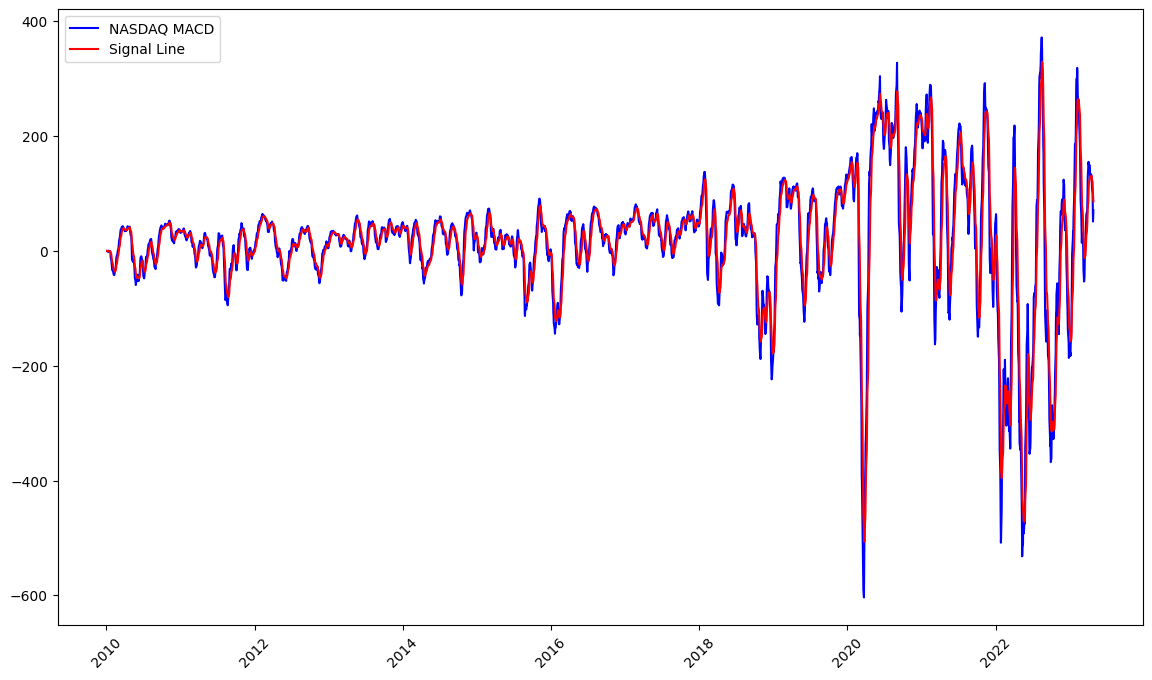

In [11]:
## Calculate the MACD and Signal Line indicators
## Calculate the Short Term Exponential Moving Average
ShortEMA = nasdaq.Close.ewm(span=12, adjust=False).mean() 
## Calculate the Long Term Exponential Moving Average
LongEMA = nasdaq.Close.ewm(span=26, adjust=False).mean() 
## Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
## Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

## Plot the Chart
plt.figure(figsize=(14,8))
plt.plot(nasdaq.index, MACD, label='NASDAQ MACD', color = 'blue')
plt.plot(nasdaq.index, signal, label='Signal Line', color='red')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

# **Task 4**

In [12]:
# Define the parameter ranges for optimization
keltner_window_range = range(10, 31, 5)
keltner_multiplier_range = np.arange(1.0, 3.0, 0.5)
bollinger_window_range = range(10, 51, 5)
bollinger_std_range = np.arange(1.0, 3.0, 0.5)
macd_fast_range = range(12, 26, 2)
macd_slow_range = range(26, 40, 2)


In [13]:
# Compute the Bollinger Bands
def compute_bollinger_bands(data, window, std):
  MA = data['Close'].rolling(window).mean()
  SD = data['Close'].rolling(window).std()
  upper_band = MA + (std * SD)
  lower_band = MA - (std * SD)
  return upper_band, lower_band

In [14]:

index = nasdaq

# Define the parameter ranges for optimization
keltner_window_range = range(10, 31, 5)
keltner_multiplier_range = np.arange(1.0, 3.0, 0.5)
bollinger_window_range = range(10, 51, 5)
bollinger_std_range = np.arange(1.0, 3.0, 0.5)
macd_fast_range = range(12, 26, 2)
macd_slow_range = range(26, 40, 2)

def calculate_performance(indicator_signal, returns):
    strategy_returns = indicator_signal * returns
    roi = np.exp(np.sum(strategy_returns))
    return roi


# Define the objective function
def objective_function(params):
    # Extract the parameters
    keltner_window, keltner_multiplier, bollinger_window, bollinger_std, macd_fast, macd_slow = params

    # Calculate the indicator values
    # ... (Code to calculate Keltner Channel, Bollinger Bands, and MACD)
    index['Typical Price'] = (index['High'] + index['Low'] + index['Close']) / 3
    index['ATR'] = index['High'] - index['Low']
    index['kc_middle'] = index['Typical Price'].rolling(keltner_window).mean()
    index['kc_upper'] = index['kc_middle'] + keltner_multiplier * index['ATR'].rolling(keltner_window).mean()
    index['kc_lower'] = index['kc_middle'] - keltner_multiplier * index['ATR'].rolling(keltner_window).mean()



# Calculate the indicator values
    upper_band, lower_band = compute_bollinger_bands(index, bollinger_window, bollinger_std)
     
 


    # Calculate the MACD and Signal Line indicators
# Calculate the Short Term Exponential Moving Average
    ShortEMA = index.Close.ewm(span=macd_slow, adjust=False).mean() 
# Calculate the Long Term Exponential Moving Average
    LongEMA = index.Close.ewm(span=macd_fast, adjust=False).mean() 
# Calculate the Moving Average Convergence/Divergence (MACD)
    MACD = ShortEMA - LongEMA
# Calcualte the signal line
    signal = MACD.ewm(span=9, adjust=False).mean()


    keltner_indicator_signal = np.where(index['Close'] > index['kc_upper'], -1, np.where(index['Close'] < index['kc_lower'], 1, 0))
    bollinger_indicator_signal = np.where(index['Close'] > upper_band, -1, np.where(index['Close'] < lower_band, 1, 0))
    macd_indicator_signal = np.where(MACD > signal, 1, -1)


       # Calculate the returns and ensure the same length as indicator signals
    returns = np.diff(np.log(index['Close']))
    returns = np.concatenate(([0], returns))

    # Calculate the performance metric for each indicator
    keltner_performance = calculate_performance(keltner_indicator_signal, returns)
    bollinger_performance = calculate_performance(bollinger_indicator_signal, returns)
    macd_performance = calculate_performance(macd_indicator_signal, returns)

    # Calculate the overall performance metric (e.g., average, weighted average)
    performance_metric = (keltner_performance + bollinger_performance + macd_performance) / 3

    # Return the negative performance metric (to be minimized)
    return -performance_metric

# Perform grid search optimization
def grid_search_optimization():
    best_params = None
    best_performance = float('-inf')

    for keltner_window in keltner_window_range:
        for keltner_multiplier in keltner_multiplier_range:
            for bollinger_window in bollinger_window_range:
                for bollinger_std in bollinger_std_range:
                    for macd_fast in macd_fast_range:
                        for macd_slow in macd_slow_range:
                            params = [keltner_window, keltner_multiplier, bollinger_window, bollinger_std, macd_fast, macd_slow]
                            performance = objective_function(params)
                            if performance > best_performance:
                                best_performance = performance
                                best_params = params

# Print the best parameters and performance
    print("Best Parameters:", best_params)
    print("Best Performance:", best_performance)

    return params


In [15]:
params=grid_search_optimization()

Best Parameters: [10, 1.0, 10, 1.0, 12, 26]
Best Performance: -0.0009290194718865872


# **Task 5**

In [16]:
index2 = nse

In [17]:
keltner_window, keltner_multiplier, bollinger_window, bollinger_std, macd_fast, macd_slow = params

In [30]:
# Calculate the Keltner Channel
index2['Typical Price'] = (index2['High'] + index2['Low'] + index2['Close']) / 3
index2['ATR'] = index2['High'] - index2['Low']
index2['kc_middle'] = index2['Typical Price'].rolling(keltner_window).mean()
index2['kc_upper'] = index2['kc_middle'] + keltner_multiplier * index2['ATR'].rolling(keltner_window).mean()
index2['kc_lower'] = index2['kc_middle'] - keltner_multiplier * index2['ATR'].rolling(keltner_window).mean()

# Calculate the Bollinger Bands
upper_band, lower_band = compute_bollinger_bands(index2, bollinger_window, bollinger_std)

# Calculate the MACD and Signal Line
ShortEMA = index2['Close'].ewm(span=macd_slow, adjust=False).mean()
LongEMA = index2['Close'].ewm(span=macd_fast, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()

# Generate signals for Keltner Channel
keltner_signal = np.where(index2['Close'] > index2['kc_upper'], -1, np.where(index2['Close'] < index2['kc_lower'], 1, 0))

# Generate signals for Bollinger Bands
bollinger_signal = np.where(index2['Close'] > upper_band, -1, np.where(index2['Close'] < lower_band, 1, 0))

# Generate signals for MACD
macd_signal = np.where(MACD > signal, 1, -1)


In [61]:
keltner_signal

array([ 0,  0,  0, ...,  0,  0, -1])

In [62]:
bollinger_signal

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
macd_signal

array([-1, -1, -1, ..., -1, -1, -1])

In [31]:
keltner_signal_records = []
date_records = []
return_records = []

for i in range(len(index2) - 1):
    date = index2.index[i]
    signal = keltner_signal[i]  # Change the signal variable according to the indicator being used
    
    # Record the signal, date, and corresponding return
    keltner_signal_records.append(signal)
    date_records.append(date)
    return_records.append(index2['Close'].pct_change()[i + 1])  # Calculate the return for the next day


keltner_signal_df = pd.DataFrame({'Date': date_records, 'Signal': keltner_signal_records, 'Return': return_records})



In [32]:
buy_signals_keltner = keltner_signal_df[(keltner_signal_df['Signal'] == 1) & (keltner_signal_df['Return']>0)]
sell_signals_keltner = keltner_signal_df[(keltner_signal_df['Signal'] == -1) & (keltner_signal_df['Return']<0)]

print("Buy Signals:")
print(buy_signals_keltner['Return'])

print("\nSell Signals:")
print(sell_signals_keltner['Return'])

Buy Signals:
29      0.027165
82      0.016027
85      0.021793
88      0.000672
94      0.006635
          ...   
3183    0.000144
3186    0.012251
3187    0.024961
3228    0.011965
3230    0.019333
Name: Return, Length: 282, dtype: float64

Sell Signals:
43     -0.001726
44     -0.000353
48     -0.002815
50     -0.009491
52     -0.004672
          ...   
3223   -0.016741
3240   -0.016762
3250   -0.001817
3252   -0.003252
3255   -0.007114
Name: Return, Length: 418, dtype: float64


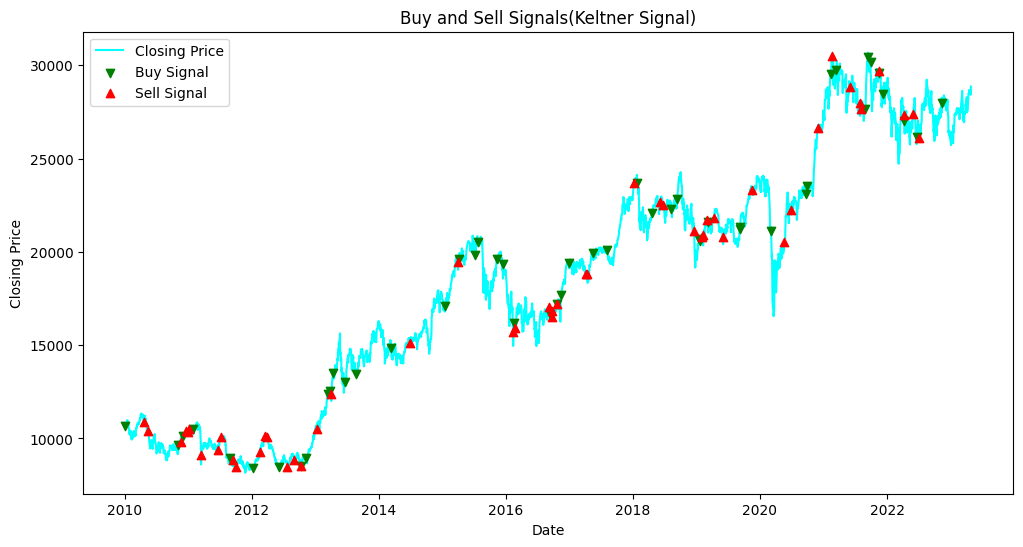

In [87]:
import random
import matplotlib.pyplot as plt

# Align the indexes
buy_signals_keltner = buy_signals_keltner.reindex(index2.index, fill_value=0) #

# Get a random sample of buy and sell signals
num_points = 50  # Number of points to plot
buy_indices = random.sample(list(buy_signals_keltner[buy_signals_keltner == 1].index), num_points)
sell_indices = random.sample(list(buy_signals_keltner[buy_signals_keltner == -1].index), num_points)

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(index2['Close'], color='cyan',label='Closing Price', zorder=1)  #

# Plot the buy signals as green inverted triangles
plt.scatter(buy_indices, index2.loc[buy_indices, 'Close'], color='green', marker='v', label='Buy Signal', zorder=2) #

# Plot the sell signals as red  triangles
plt.scatter(sell_indices, index2.loc[sell_indices, 'Close'], color='red', marker='^', label='Sell Signal', zorder=2) #

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Buy and Sell Signals(Keltner Signal)')
plt.legend()

# Display the graph
plt.show()




In [101]:
risk_free_rate=0.02
# Calculate cumulative returns for buy signals
buy_returns = buy_signals_keltner['Return']
buy_cumulative_returns = (1 + buy_returns).cumprod()

# Calculate annualized returns for buy signals
buy_annual_returns = (1 + np.mean(buy_returns)) ** 252 - 1

# Calculate volatility for buy signals
buy_volatility = np.std(buy_returns) * np.sqrt(252)

# Calculate Sharpe ratio for buy signals
if buy_volatility != 0:
    buy_sharpe_ratio = (buy_annual_returns - risk_free_rate) / buy_volatility
else:
    buy_sharpe_ratio = 0.0

# Calculate maximum drawdown for buy signals
buy_peak = np.maximum.accumulate(buy_cumulative_returns)
buy_drawdown = (buy_cumulative_returns / buy_peak) - 1
buy_max_drawdown = np.min(buy_drawdown)

print("\nBuy Signals:")
print("Cumulative Returns:", buy_cumulative_returns.iloc[-1])
print("Sharpe Ratio:", buy_sharpe_ratio)
print("Max Drawdown:", buy_max_drawdown)


# Calculate cumulative returns for sell signals
sell_returns = sell_signals_keltner['Return']
sell_cumulative_returns = (1 + sell_returns).cumprod()

# Calculate annualized returns for sell signals
sell_annual_returns = (1 + np.mean(sell_returns)) ** 252 - 1

# Calculate volatility for sell signals
sell_volatility = np.std(sell_returns) * np.sqrt(252)

# Calculate Sharpe ratio for sell signals
if sell_volatility != 0:
    sell_sharpe_ratio = (sell_annual_returns - risk_free_rate) / sell_volatility
else:
    sell_sharpe_ratio = 0.0

# Calculate maximum drawdown for sell signals
sell_peak = np.maximum.accumulate(sell_cumulative_returns)
sell_drawdown = (sell_cumulative_returns / sell_peak) - 1
sell_max_drawdown = np.min(sell_drawdown)

print("\nSell Signals:")
print("Cumulative Returns:", sell_cumulative_returns.iloc[-1])
print("Sharpe Ratio:", sell_sharpe_ratio)
print("Max Drawdown:", sell_max_drawdown)


Buy Signals:
Cumulative Returns: 1.0
Sharpe Ratio: 0.0
Max Drawdown: 0.0

Sell Signals:
Cumulative Returns: 0.055777525207907595
Sharpe Ratio: -7.557933217397533
Max Drawdown: -0.9441260456709382


Buy Signals:
519     0.010754
522     0.004351
954     0.001049
1186    0.004439
1688    0.002608
1962    0.005712
2137    0.010759
2138    0.000102
2139    0.008237
2140    0.002946
2141    0.003907
2144    0.005212
2145    0.001025
2651    0.009125
2652    0.021155
2653    0.002647
2654    0.017828
2655    0.006757
2657    0.020526
2658    0.004157
2855    0.008640
2856    0.008860
2858    0.012452
2859    0.002157
2860    0.007315
Name: Return, dtype: float64

Sell Signals:
92     -0.002672
93     -0.030590
290    -0.105539
292    -0.014411
462    -0.000633
1000   -0.041771
1002   -0.001781
1382   -0.046057
1383   -0.039588
1389   -0.003869
1472   -0.003905
1473   -0.027065
1476   -0.005443
1477   -0.011170
1480   -0.024301
1864   -0.009764
1869   -0.003969
1870   -0.000479
1986   -0.006451
1987   -0.004260
2082   -0.001210
2084   -0.007830
2201   -0.011102
2202   -0.050106
2481   -0.007928
2482   -0.021313
2483   -0.036689
2485   -0.012245
2489   -0.050651
2491   -0.022704
2492   -

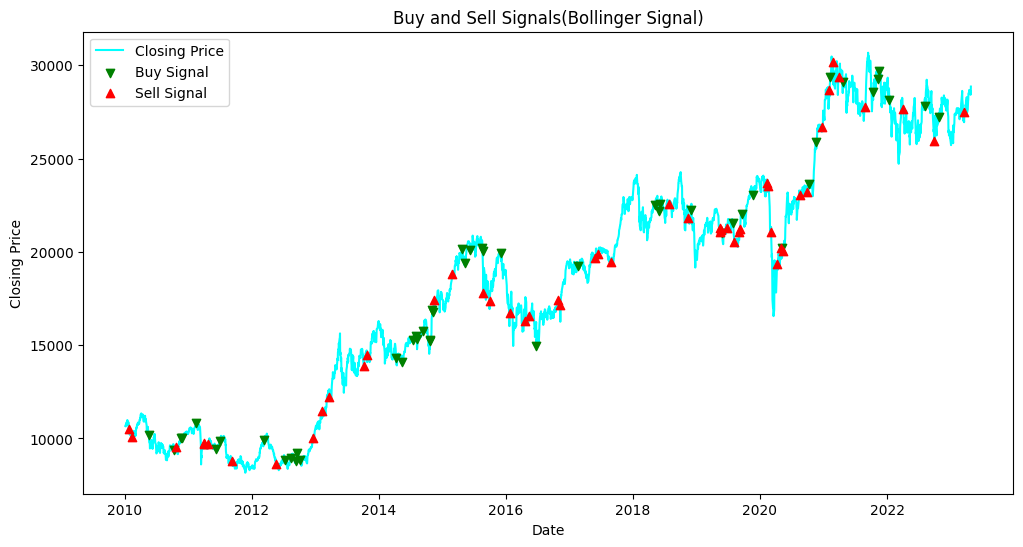

In [98]:
bollinger_signal_records = []
date_records = []
return_records = []

for i in range(len(index2) - 1):
    date = index2.index[i]
    signal = bollinger_signal[i]  # Change the signal variable according to the indicator being used
    
    # Record the signal, date, and corresponding return
    bollinger_signal_records.append(signal)
    date_records.append(date)
    return_records.append(index2['Close'].pct_change()[i + 1])  # Calculate the return for the next day


bollinger_signal_df = pd.DataFrame({'Date': date_records, 'Signal': bollinger_signal_records, 'Return': return_records})

buy_signals_bollinger = bollinger_signal_df[(bollinger_signal_df['Signal'] == -1) & (bollinger_signal_df['Return'] > 0)]
sell_signals_bollinger = bollinger_signal_df[(bollinger_signal_df['Signal'] == 1) & ((bollinger_signal_df['Return'] < 0))]

print("Buy Signals:")
print(buy_signals_bollinger['Return'])

print("\nSell Signals:")
print(sell_signals_bollinger['Return'])

import random
import matplotlib.pyplot as plt

# Align the indexes
buy_signals_bollinger = buy_signals_bollinger.reindex(index2.index, fill_value=0) #

# Get a random sample of buy and sell signals
num_points = 50  # Number of points to plot
buy_indices = random.sample(list(buy_signals_bollinger[(buy_signals_bollinger == 1) & (bollinger_signal_df['Return'] > 0)].index), num_points)
sell_indices = random.sample(list(buy_signals_bollinger[(buy_signals_bollinger == -1) & (bollinger_signal_df['Return'] < 0)].index), num_points)

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(index2['Close'], color='cyan',label='Closing Price', zorder=1) #

# Plot the buy signals as green triangles
plt.scatter(buy_indices, index2.loc[buy_indices, 'Close'], color='green', marker='v', label='Buy Signal', zorder=2) #

# Plot the sell signals as red triangles
plt.scatter(sell_indices, index2.loc[sell_indices, 'Close'], color='red', marker='^', label='Sell Signal', zorder=2) #

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Buy and Sell Signals(Bollinger Signal)')
plt.legend()

# Display the graph
plt.show()


In [100]:
risk_free_rate=0.02
# Calculate cumulative returns for buy signals
buy_returns = buy_signals_bollinger['Return']
buy_cumulative_returns = (1 + buy_returns).cumprod()

# Calculate annualized returns for buy signals
buy_annual_returns = (1 + np.mean(buy_returns)) ** 252 - 1

# Calculate volatility for buy signals
buy_volatility = np.std(buy_returns) * np.sqrt(252)

# Calculate Sharpe ratio for buy signals
if buy_volatility != 0:
    buy_sharpe_ratio = (buy_annual_returns - risk_free_rate) / buy_volatility
else:
    buy_sharpe_ratio = 0.0

# Calculate maximum drawdown for buy signals
buy_peak = np.maximum.accumulate(buy_cumulative_returns)
buy_drawdown = (buy_cumulative_returns / buy_peak) - 1
buy_max_drawdown = np.min(buy_drawdown)

print("\nBuy Signals:")
print("Cumulative Returns:", buy_cumulative_returns.iloc[-1])
print("Sharpe Ratio:", buy_sharpe_ratio)
print("Max Drawdown:", buy_max_drawdown)


# Calculate cumulative returns for sell signals
sell_returns = sell_signals_bollinger['Return']
sell_cumulative_returns = (1 + sell_returns).cumprod()

# Calculate annualized returns for sell signals
sell_annual_returns = (1 + np.mean(sell_returns)) ** 252 - 1

# Calculate volatility for sell signals
sell_volatility = np.std(sell_returns) * np.sqrt(252)

# Calculate Sharpe ratio for sell signals
if sell_volatility != 0:
    sell_sharpe_ratio = (sell_annual_returns - risk_free_rate) / sell_volatility
else:
    sell_sharpe_ratio = 0.0

# Calculate maximum drawdown for sell signals
sell_peak = np.maximum.accumulate(sell_cumulative_returns)
sell_drawdown = (sell_cumulative_returns / sell_peak) - 1
sell_max_drawdown = np.min(sell_drawdown)

print("\nSell Signals:")
print("Cumulative Returns:", sell_cumulative_returns.iloc[-1])
print("Sharpe Ratio:", sell_sharpe_ratio)
print("Max Drawdown:", sell_max_drawdown)


Buy Signals:
Cumulative Returns: 1.0
Sharpe Ratio: 0.0
Max Drawdown: 0.0

Sell Signals:
Cumulative Returns: 0.4457618978154339
Sharpe Ratio: -2.9341336389218293
Max Drawdown: -0.5530440479513619


Buy Signals:
16      0.015822
18      0.000684
19      0.016273
20      0.003205
25      0.003130
          ...   
3235    0.013283
3237    0.009306
3243    0.004192
3244    0.010484
3245    0.005706
Name: Return, Length: 837, dtype: float64

Sell Signals:
2      -0.004640
5      -0.013246
8      -0.011566
9      -0.008308
10     -0.002544
          ...   
3240   -0.016762
3241   -0.012247
3250   -0.001817
3252   -0.003252
3255   -0.007114
Name: Return, Length: 803, dtype: float64


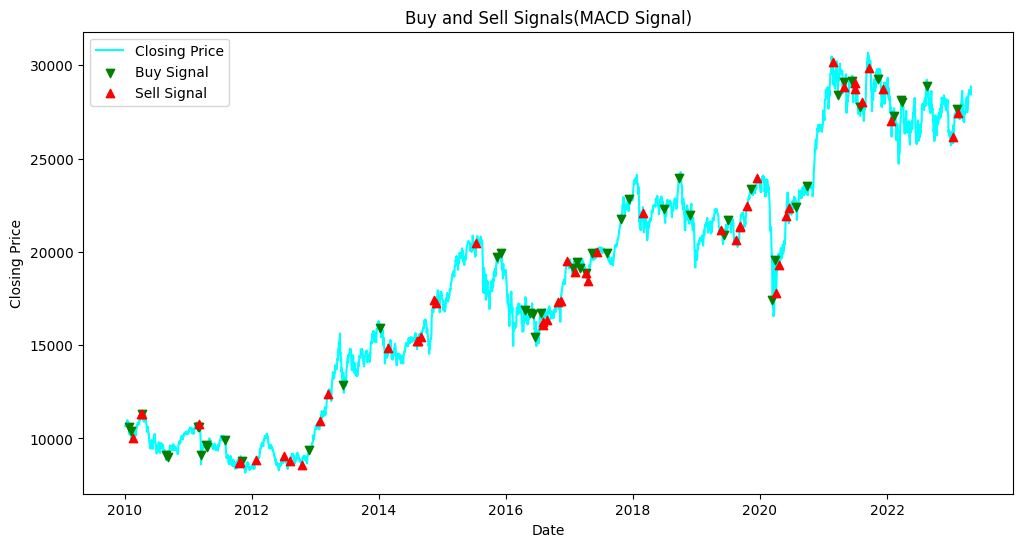

In [91]:
macd_signal_records = []
date_records = []
return_records = []

for i in range(len(index2) - 1):
    date = index2.index[i]
    signal = macd_signal[i]  # Change the signal variable according to the indicator being used
    
    # Record the signal, date, and corresponding return
    macd_signal_records.append(signal)
    date_records.append(date)
    return_records.append(index2['Close'].pct_change()[i + 1])  # Calculate the return for the next day


macd_signal_df = pd.DataFrame({'Date': date_records, 'Signal': macd_signal_records, 'Return': return_records})

buy_signals_macd = macd_signal_df[(macd_signal_df['Signal'] == 1) & (macd_signal_df['Return'] > 0)]
sell_signals_macd = macd_signal_df[(macd_signal_df['Signal'] == -1) & ((macd_signal_df['Return'] < 0))]

print("Buy Signals:")
print(buy_signals_macd['Return'])

print("\nSell Signals:")
print(sell_signals_macd['Return'])

import random
import matplotlib.pyplot as plt

# Align the indexes
buy_signals_macd = buy_signals_macd.reindex(index2.index, fill_value=0) #

# Get a random sample of buy and sell signals
num_points = 50  # Number of points to plot
buy_indices = random.sample(list(buy_signals_macd[(buy_signals_macd == 1) & (macd_signal_df['Return'] > 0)].index), num_points) 
sell_indices = random.sample(list(buy_signals_macd[(buy_signals_macd == -1) & (macd_signal_df['Return'] < 0)].index), num_points) 

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(index2['Close'], color='cyan',label='Closing Price', zorder=1)

# Plot the buy signals as green triangles
plt.scatter(buy_indices, index2.loc[buy_indices, 'Close'], color='green', marker='v', label='Buy Signal', zorder=2) #

# Plot the sell signals as red triangles
plt.scatter(sell_indices, index2.loc[sell_indices, 'Close'], color='red', marker='^', label='Sell Signal', zorder=2) #

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Buy and Sell Signals(MACD Signal)')
plt.legend()

# Display the graph
plt.show()


In [92]:
risk_free_rate=0.02

In [93]:
print(keltner_signal_df)
print('\n')
print(bollinger_signal_df)
print('\n')
print(macd_signal_df)


           Date  Signal    Return
0    2010-01-04       0  0.002538
1    2010-01-05       0  0.004645
2    2010-01-06       0 -0.004640
3    2010-01-07       0  0.010922
4    2010-01-08       0  0.007484
...         ...     ...       ...
3253 2023-04-21      -1  0.001021
3254 2023-04-24      -1  0.000929
3255 2023-04-25      -1 -0.007114
3256 2023-04-26       0  0.001450
3257 2023-04-27       0  0.014012

[3258 rows x 3 columns]


           Date  Signal    Return
0    2010-01-04       0  0.002538
1    2010-01-05       0  0.004645
2    2010-01-06       0 -0.004640
3    2010-01-07       0  0.010922
4    2010-01-08       0  0.007484
...         ...     ...       ...
3253 2023-04-21       0  0.001021
3254 2023-04-24       0  0.000929
3255 2023-04-25       0 -0.007114
3256 2023-04-26       0  0.001450
3257 2023-04-27       0  0.014012

[3258 rows x 3 columns]


           Date  Signal    Return
0    2010-01-04      -1  0.002538
1    2010-01-05      -1  0.004645
2    2010-01-06      -1 -0.0

In [37]:
risk_free_rate=0.02

In [94]:
# Calculate cumulative returns for buy signals
buy_returns = buy_signals_macd['Return']
buy_cumulative_returns = (1 + buy_returns).cumprod()

# Calculate annualized returns for buy signals
buy_annual_returns = (1 + np.mean(buy_returns)) ** 252 - 1

# Calculate volatility for buy signals
buy_volatility = np.std(buy_returns) * np.sqrt(252)

# Calculate Sharpe ratio for buy signals
if buy_volatility != 0:
    buy_sharpe_ratio = (buy_annual_returns - risk_free_rate) / buy_volatility
else:
    buy_sharpe_ratio = 0.0

# Calculate maximum drawdown for buy signals
buy_peak = np.maximum.accumulate(buy_cumulative_returns)
buy_drawdown = (buy_cumulative_returns / buy_peak) - 1
buy_max_drawdown = np.min(buy_drawdown)

print("\nBuy Signals:")
print("Cumulative Returns:", buy_cumulative_returns.iloc[-1])
print("Sharpe Ratio:", buy_sharpe_ratio)
print("Max Drawdown:", buy_max_drawdown)


# Calculate cumulative returns for sell signals
sell_returns = sell_signals_macd['Return']
sell_cumulative_returns = (1 + sell_returns).cumprod()

# Calculate annualized returns for sell signals
sell_annual_returns = (1 + np.mean(sell_returns)) ** 252 - 1

# Calculate volatility for sell signals
sell_volatility = np.std(sell_returns) * np.sqrt(252)

# Calculate Sharpe ratio for sell signals
if sell_volatility != 0:
    sell_sharpe_ratio = (sell_annual_returns - risk_free_rate) / sell_volatility
else:
    sell_sharpe_ratio = 0.0

# Calculate maximum drawdown for sell signals
sell_peak = np.maximum.accumulate(sell_cumulative_returns)
sell_drawdown = (sell_cumulative_returns / sell_peak) - 1
sell_max_drawdown = np.min(sell_drawdown)

print("\nSell Signals:")
print("Cumulative Returns:", sell_cumulative_returns.iloc[-1])
print("Sharpe Ratio:", sell_sharpe_ratio)
print("Max Drawdown:", sell_max_drawdown)


Buy Signals:
Cumulative Returns: 1.0
Sharpe Ratio: 0.0
Max Drawdown: 0.0

Sell Signals:
Cumulative Returns: 0.0012354370281797127
Sharpe Ratio: -7.056868806711367
Max Drawdown: -0.9987588042735475


In [24]:
#for metrices in assignment 1 we will use bollinger signals

[*********************100%***********************]  1 of 1 completed
Buy Signals:
459     0.000389
845     0.005114
1791    0.004992
1793    0.001679
1794    0.006048
1796    0.000419
Name: Return, dtype: float64

Sell Signals:
96     -0.012908
98     -0.005661
358    -0.000956
359    -0.004187
400    -0.000575
401    -0.066634
403    -0.044152
597    -0.015051
598    -0.007388
722    -0.001594
1203   -0.008100
1417   -0.031851
1418   -0.039414
1419   -0.013522
1512   -0.023700
1513   -0.010838
1520   -0.011694
1721   -0.004423
1722   -0.001666
2208   -0.020573
2210   -0.005905
2220   -0.006560
2256   -0.015772
2257   -0.020588
2258   -0.027112
2554   -0.008238
2563   -0.095113
2567   -0.051831
2570   -0.029294
3033   -0.018915
3035   -0.012172
3036   -0.001497
3037   -0.005384
Name: Return, dtype: float64


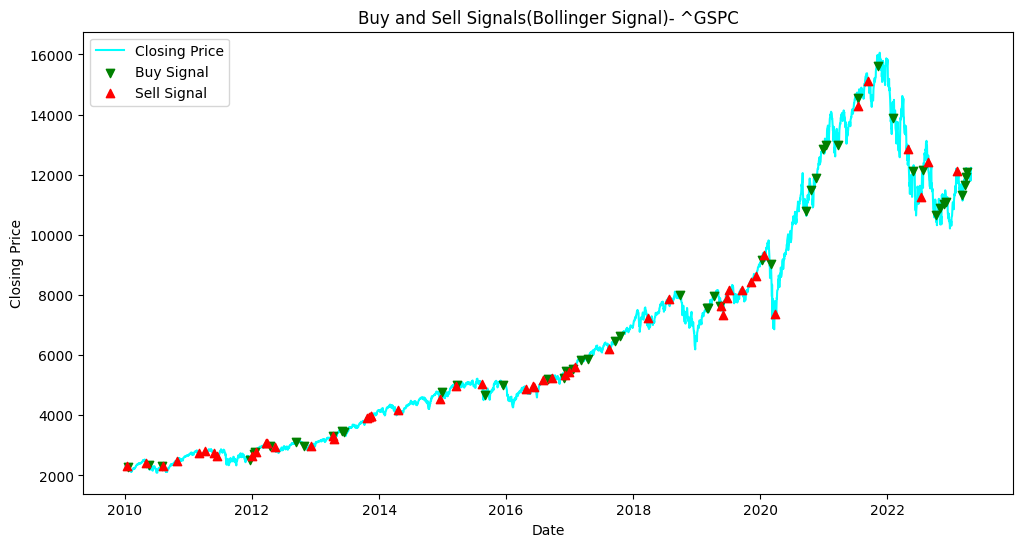

[*********************100%***********************]  1 of 1 completed
Buy Signals:
838     0.004244
839     0.001079
840     0.004899
843     0.000643
844     0.006927
845     0.002602
885     0.006087
886     0.002058
933     0.001517
1838    0.006964
1840    0.003935
1842    0.007274
1843    0.000619
2017    0.000865
2026    0.007055
2936    0.001424
Name: Return, dtype: float64

Sell Signals:
96     -0.006949
97     -0.001175
362    -0.001528
401    -0.068994
598    -0.012404
1201   -0.014634
1203   -0.002803
1417   -0.035151
1418   -0.038204
1419   -0.004366
1512   -0.030260
1513   -0.009767
1514   -0.001214
1516   -0.034115
1519   -0.002555
1520   -0.001175
1721   -0.009237
1722   -0.002380
2208   -0.012529
2210   -0.008824
2257   -0.029934
2258   -0.022118
2563   -0.094347
2567   -0.047028
3031   -0.011487
3032   -0.012987
3033   -0.027208
3035   -0.022796
3037   -0.013982
Name: Return, dtype: float64


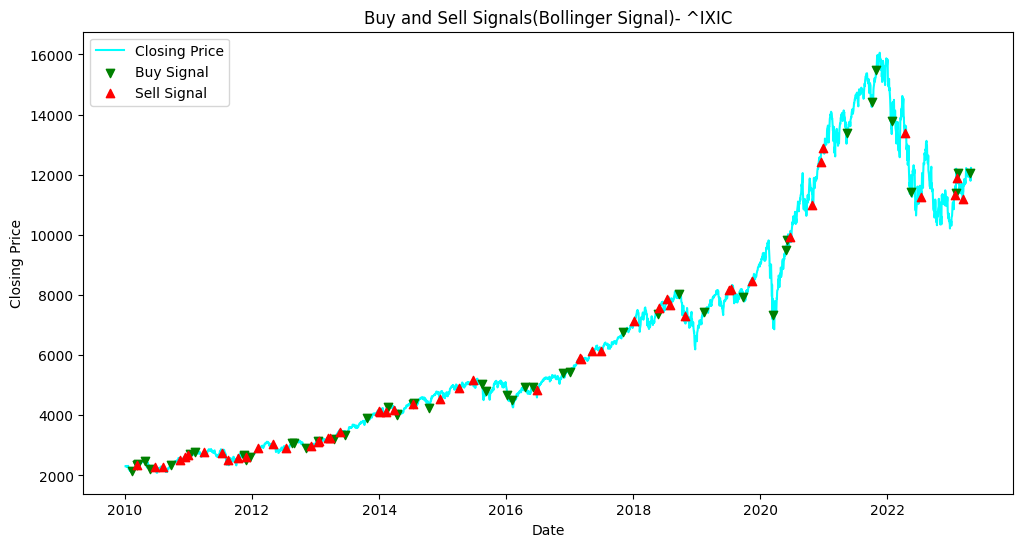

[*********************100%***********************]  1 of 1 completed
Buy Signals:
459     0.001848
1641    0.001333
1642    0.007310
1643    0.000548
1644    0.000891
1727    0.002115
1728    0.001116
1729    0.002882
1731    0.001891
1791    0.005240
1792    0.000384
1793    0.000208
1794    0.005768
1795    0.001572
1796    0.001671
1797    0.000550
2623    0.017021
2815    0.009021
2816    0.005333
Name: Return, dtype: float64

Sell Signals:
96     -0.012441
97     -0.002267
98     -0.006900
401    -0.055464
598    -0.005876
608    -0.001412
722    -0.002273
1204   -0.001518
1417   -0.031249
1418   -0.035748
1419   -0.012911
1512   -0.023211
1513   -0.010152
1516   -0.022088
1520   -0.015564
2256   -0.019897
2257   -0.018121
2258   -0.029100
2552   -0.004570
2553   -0.044179
2554   -0.013866
2563   -0.099884
2567   -0.063024
2569   -0.045462
2570   -0.030356
2948   -0.001490
3318   -0.002836
Name: Return, dtype: float64


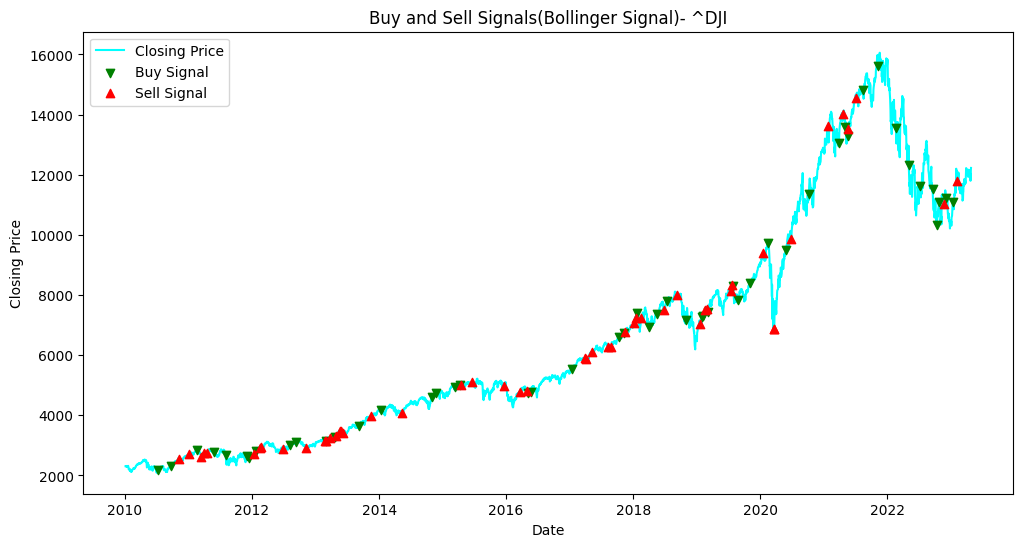

[*********************100%***********************]  1 of 1 completed
Buy Signals:
846     0.001122
851     0.005350
1638    0.011300
2515    0.000825
2518    0.001149
2520    0.001128
2743    0.013530
3031    0.001559
3289    0.002040
Name: Return, dtype: float64

Sell Signals:
95     -0.002011
302    -0.013835
303    -0.017049
399    -0.034273
400    -0.027090
401    -0.033924
403    -0.030533
597    -0.012377
598    -0.013262
724    -0.012716
1159   -0.004547
1207   -0.002528
1373   -0.000060
1421   -0.028298
1422   -0.046673
1424   -0.016789
1500   -0.022224
1501   -0.013221
1840   -0.004631
1842   -0.000548
2190   -0.008709
2191   -0.005643
2193   -0.000797
2216   -0.001570
2562   -0.019408
2564   -0.034945
2565   -0.031752
2571   -0.076873
2572   -0.000939
2573   -0.014043
2574   -0.108738
2576   -0.040066
2578   -0.040473
2734   -0.000179
2735   -0.000806
3074   -0.003950
3143   -0.004074
3333   -0.010067
Name: Return, dtype: float64


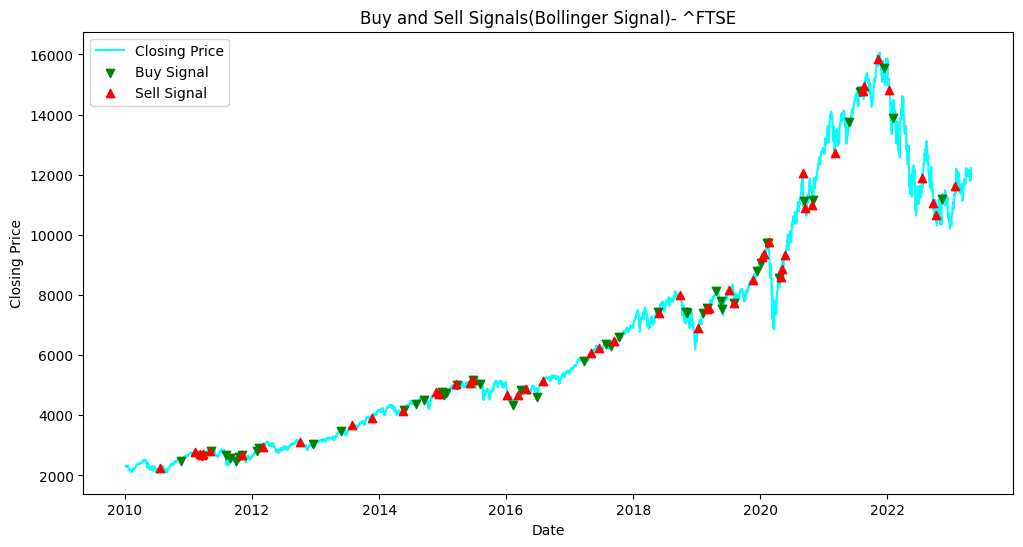

[*********************100%***********************]  1 of 1 completed
Buy Signals:
519     0.010754
522     0.004351
954     0.001049
1186    0.004439
1688    0.002608
1962    0.005712
2137    0.010759
2138    0.000102
2139    0.008237
2140    0.002946
2141    0.003907
2144    0.005212
2145    0.001025
2651    0.009125
2652    0.021155
2653    0.002647
2654    0.017828
2655    0.006757
2657    0.020526
2658    0.004157
2855    0.008640
2856    0.008860
2858    0.012452
2859    0.002157
2860    0.007315
Name: Return, dtype: float64

Sell Signals:
92     -0.002672
93     -0.030590
290    -0.105539
292    -0.014411
462    -0.000633
1000   -0.041771
1002   -0.001781
1382   -0.046057
1383   -0.039588
1389   -0.003869
1472   -0.003905
1473   -0.027065
1476   -0.005443
1477   -0.011170
1480   -0.024301
1864   -0.009764
1869   -0.003969
1870   -0.000479
1986   -0.006451
1987   -0.004260
2082   -0.001210
2084   -0.007830
2201   -0.011102
2202   -0.050106
2481   -0.007928
2482   -0.021313
2483   

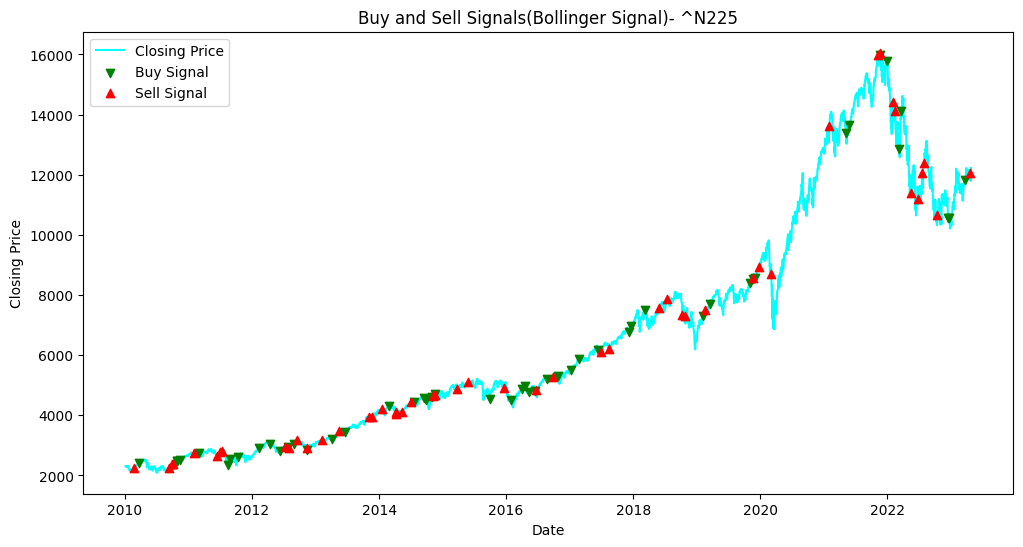

In [25]:
indices = ['^GSPC', '^IXIC', '^DJI', '^FTSE', '^N225']  # Example indices
equities = ['AAPL', 'GOOGL', 'AMZN', 'MSFT','INFY']  # Updated list of equities
# Load the historical data for indices

for i in range(0,5):
  indice=indices[i]
  index2 = yf.download(indice, start='2010-01-01', end='2023-05-01')  
  signal_records = []
  date_records = []
  return_records = []
  upper_band, lower_band = compute_bollinger_bands(index2, bollinger_window, bollinger_std)
  # Generate signals for Bollinger Bands
  bollinger_signal = np.where(index2['Close'] > upper_band, -1, np.where(index2['Close'] < lower_band, 1, 0))

  for i in range(len(index2) - 1):
    date = index2.index[i]
    signal = bollinger_signal[i]  # Change the signal variable according to the indicator being used
    
    # Record the signal, date, and corresponding return
    signal_records.append(signal)
    date_records.append(date)
    return_records.append(index2['Close'].pct_change()[i + 1])  # Calculate the return for the next day


  signal_df = pd.DataFrame({'Date': date_records, 'Signal': signal_records, 'Return': return_records})

  buy_signals_bollinger = signal_df[(signal_df['Signal'] == -1) & (signal_df['Return'] > 0)]
  sell_signals_bollinger = signal_df[(signal_df['Signal'] == 1) & ((signal_df['Return'] < 0))]
  print("Buy Signals:")
  print(buy_signals_bollinger['Return'])

  print("\nSell Signals:")
  print(sell_signals_bollinger['Return'])


# Align the indexes
  buy_signals_bollinger = buy_signals_bollinger.reindex(index.index, fill_value=0)

# Get a random sample of buy and sell signals
  num_points = 50  # Number of points to plot
  buy_indices = random.sample(list(buy_signals_bollinger[(buy_signals_bollinger == 1) & (signal_df['Return'] > 0)].index), num_points)
  sell_indices = random.sample(list(buy_signals_bollinger[(buy_signals_bollinger == -1) & (signal_df['Return'] < 0)].index), num_points)

# Plot the closing prices
  plt.figure(figsize=(12, 6))
  plt.plot(index['Close'], color='cyan',label='Closing Price', zorder=1)

# Plot the buy signals as green triangles
  plt.scatter(buy_indices, index.loc[buy_indices, 'Close'], color='green', marker='v', label='Buy Signal', zorder=2)

# Plot the sell signals as red triangles
  plt.scatter(sell_indices, index.loc[sell_indices, 'Close'], color='red', marker='^', label='Sell Signal', zorder=2)

  plt.xlabel('Date')
  plt.ylabel('Closing Price')
  plt.title('Buy and Sell Signals(Bollinger Signal)- '+ indice)
  plt.legend()

# Display the graph
  plt.show()




# Load the historical data for equities
equity_data = yf.download(equities, start='2010-01-01', end='2023-05-01', progress=False)['Adj Close']

